In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os.path
datadir = '/Users/billie/Dropbox/Tether/Data_binned2beads_Centres_wrap/'
plotsdir = '/Users/billie/Dropbox/Tether/Plotting/Plotting2Beads/Plots/'
expdatadir = '/Users/billie/Dropbox/Tether/Plotting/Plotting2Beads/'

datadir = '/Users/billiemeadowcroft/Dropbox/Tether/Data_binned2beads_Centres_wrap/'
plotsdir = '/Users/billiemeadowcroft/Dropbox/Tether/Plotting/Plotting2Beads/Plots/'
expdatadir = '/Users/billiemeadowcroft/Dropbox/Tether/Plotting/Plotting2Beads/'
afshindatadir = '/Users/billiemeadowcroft/Documents/PHD/Tether/RefResponse_plots/AfshinData/simulation/'

#plotsdir = '/Users/billie/Dropbox/Tether/Plotting/Plots/'
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Fetching averages

In [2]:
clrs = ['#2A0944','#3FA796','#FEC260', '#A10035','pink','lightsalmon']

fname2 = '2beads_binnedx2_Rcut1.2_centres_wrapx3.dat'

t_eq = 2000000
aaa = np.arange(21,90,1)
aaa = np.arange(14,60,1)
www = np.arange(170,200,1)


Energies = np.empty((len(aaa),100000,len(www)))
Energies[:] = np.nan
EnSTD= np.zeros((len(aaa),len(www)))
Energy= np.zeros((len(aaa),len(www)))
Bendings = np.empty((len(aaa),100000,len(www)))
Bendings[:] = np.nan
BeSTD= np.zeros((len(aaa),len(www)))
Bending= np.zeros((len(aaa),len(www)))
Bindings = np.empty((len(aaa),100000,len(www)))
Bindings[:] = np.nan
BiSTD= np.zeros((len(aaa),len(www)))
Binding= np.zeros((len(aaa),len(www)))
Stretchings  = np.empty((len(aaa),100000,len(www)))
Stretchings[:] = np.nan
Stretching= np.zeros((len(aaa),len(www)))
StSTD= np.zeros((len(aaa),len(www)))
Wrappings  = np.empty((len(aaa),100000,len(www)))
Wrappings[:] = np.nan
WrSTD= np.zeros((len(aaa),len(www)))
Wrapping= np.zeros((len(aaa),len(www)))
jj = np.zeros((len(aaa),len(www)))
fname = fname2
print(fname)
Time_ = pandas.read_csv(datadir  + fname, sep=' ', usecols = [0], header = 'infer')
Arc2s_ = pandas.read_csv(datadir  + fname, sep=' ', usecols = [1], header = 'infer')
Etot_ = pandas.read_csv(datadir  + fname, sep=' ', usecols = [3], header = 'infer')
BenCh_ = pandas.read_csv(datadir  + fname, sep=' ', usecols = [4], header = 'infer')
BinCh_ = pandas.read_csv(datadir  + fname, sep=' ', usecols = [5], header = 'infer')
StrCh_ = pandas.read_csv(datadir  + fname, sep=' ', usecols = [6], header = 'infer')
Wrap1_ = pandas.read_csv(datadir  + fname, sep=' ', usecols = [7], header = 'infer')
Wrap2_ = pandas.read_csv(datadir  + fname, sep=' ', usecols = [8], header = 'infer')
Wrap3_ = pandas.read_csv(datadir  + fname, sep=' ', usecols = [9], header = 'infer')
Time, Arc2s, Etot, BinCh, BenCh, StrCh, WrapNum1, WrapNum2, WrapNum3 =Time_.values, Arc2s_.values, Etot_.values,BinCh_.values,BenCh_.values, StrCh_.values, Wrap1_.values,Wrap2_.values,Wrap3_.values
for tt in range(len(Time)): 

    if WrapNum3[tt]>165:
        for aa in range(len(aaa)):
            if np.round(2*Arc2s[tt],0) == aaa[aa]:
                for ww in range(len(www)):
                    if WrapNum1[tt] == www[ww]:
                        #if WrapNum3[tt] == (www[ww]-27):
                        #print(WrapNum1[tt], WrapNum3[tt])
                        jjj = int(jj[aa,ww])
                        Energies[aa,jjj,ww] = Etot[tt]
                        Bendings[aa,jjj,ww] = BenCh[tt]
                        Bindings[aa,jjj,ww] = BinCh[tt]
                        Stretchings[aa,jjj,ww] = StrCh[tt]
                        Wrappings[aa,jjj,ww] = WrapNum1[tt]
                        jj[aa,ww] +=1
                        
for ww in range(len(www)):    
    for aa in range(len(aaa)):
        Energy[aa,ww] = np.nanmean(Energies[aa,:,ww])
        EnSTD[aa,ww] = np.nanstd(Energies[aa,:,ww])
        Bending[aa,ww] = np.nanmean(Bendings[aa,:,ww])
        BeSTD[aa,ww] = np.nanstd(Bendings[aa,:,ww])
        Binding[aa,ww] = np.nanmean(Bindings[aa,:,ww])
        BiSTD[aa,ww] = np.nanstd(Bindings[aa,:,ww])
        Stretching[aa,ww] = np.nanmean(Stretchings[aa,:,ww])
        Wrapping[aa,ww] = np.nanmean(Wrappings[aa,:,ww])
        StSTD[aa,ww] = np.nanstd(Stretchings[aa,:,ww])
        WrSTD[aa,ww] = np.nanstd(Wrappings[aa,:,ww])


2beads_binnedx2_Rcut1.2_centres_wrapx3.dat


/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_9124/878638666.py:63: RuntimeWarning: Mean of empty slice
  Energy[aa,ww] = np.nanmean(Energies[aa,:,ww])
/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_9124/878638666.py:65: RuntimeWarning: Mean of empty slice
  Bending[aa,ww] = np.nanmean(Bendings[aa,:,ww])
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_9124/878638666.py:67: RuntimeWarning: Mean of empty slice
  Binding[aa,ww] = np.nanmean(Bindings[aa,:,ww])
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_9124/878638666.py:69: RuntimeWarning: Mean of empty slice
  Stretching[aa,ww] = np.nanmean(Stretchings[aa,:,ww])
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_9124/878638666.py:70: RuntimeWarning: Mean of empty slice
  

## Excess, Num & Bending Energy

Text(0.5, 1.0, 'Stretching Energy')

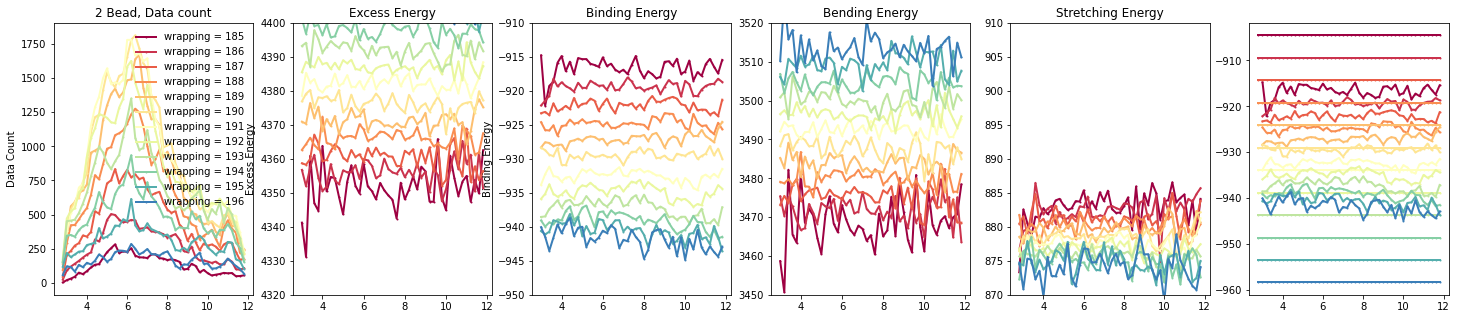

In [3]:
ExcessEn = np.add(Bending,Stretching)
ExcessEnSTD = np.add(BeSTD,StSTD)

cmap1 = plt.cm.get_cmap('Spectral') #twilight
#cmap1 = plt.cm.get_cmap('YlOrBr')
cmap2 = plt.cm.get_cmap('BuPu')
fig,ax = plt.subplots(1,6,figsize = (25,5))
takeNum = 18
line = 2
for ww in range(len(www)-takeNum): #-20
    w = ww+15
    #w = ww+17
   # if w%10==0:
        #ax[1].plot(aaa*0.2,ExcessEn[:,w] , linestyle = '-',linewidth = line,marker = 'o',markersize = 1, color = cmap1(ww/(len(www)-takeNum)))
        #ax[2].plot(aaa[1:]*0.2,Binding[1:,w], linestyle = '-',marker = 'o',markersize = 1,linewidth = line, color = cmap1(ww/(len(www)-takeNum)))
        #ax[3].plot(aaa[1:]*0.2,Bending[1:,w], linestyle = '-',marker = 'o',markersize = 1,linewidth = line, color = cmap1(ww/(len(www)-takeNum)))
        #ax[4].plot(aaa*0.2,Stretching[:,w], linestyle = '-',marker = 'o',markersize = 1, linewidth = line,color = cmap1(ww/(len(www)-takeNum)))

    #else:   
    ax[0].plot(aaa*0.2,jj[:,w], linestyle = '-',marker = 'o',markersize = 1,linewidth = line, color = cmap1(ww/(len(www)-takeNum)), label = "wrapping = "+str(www[w]))
    ax[1].plot(aaa[1:]*0.2,ExcessEn[1:,w]+(w-15)*6, linestyle = '-',linewidth = line,marker = 'o',markersize = 1, color = cmap1(ww/(len(www)-takeNum)))
    #ax[0].plot(aaa*0.2,jj[:,w], linestyle = '-',marker = 'o',markersize = 1,linewidth = line, color = cmap1(ww/(len(www)-takeNum)))
    ax[2].plot(aaa[1:]*0.2,Binding[1:,w], linestyle = '-',marker = 'o',markersize = 1, linewidth = line,color = cmap1(ww/(len(www)-takeNum)))
    ax[5].plot(aaa[1:]*0.2,Binding[1:,w], linestyle = '-',marker = 'o',markersize = 1, linewidth = line,color = cmap1(ww/(len(www)-takeNum)))
    ax[3].plot(aaa[1:]*0.2,Bending[1:,w]+(w-15)*4, linestyle = '-',marker = 'o',markersize = 1, linewidth = line,color = cmap1(ww/(len(www)-takeNum)))
    ax[4].plot(aaa*0.2,Stretching[:,w], linestyle = '-',marker = 'o',markersize = 1, linewidth = line,color = cmap1(ww/(len(www)-takeNum)))
    ax[5].plot(aaa*0.2,np.multiply(Wrapping[:,w],-(929/190)), linestyle = '-',marker = 'o',markersize = 1, linewidth = line,color = cmap1(ww/(len(www)-takeNum)))

ax[0].legend(frameon=False)
ax[0].set_title(r"2 Bead, Data count")
ax[1].set_title(r"Excess Energy")
ax[2].set_title(r"Binding Energy")
ax[3].set_title(r"Bending Energy")
ax[1].set_ylabel("Excess Energy")
ax[0].set_ylabel("Data Count")
ax[2].set_ylabel("Binding Energy")
ax[1].set_ylim([4320,4400])
ax[2].set_ylim([-950,-910])
ax[3].set_ylim([3450,3520])
ax[4].set_ylim([870,910])
#print(Bending1)
ax[4].set_title("Stretching Energy")


## Averaging

/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Energy $[k_{\\mathrm{B}}T]$')

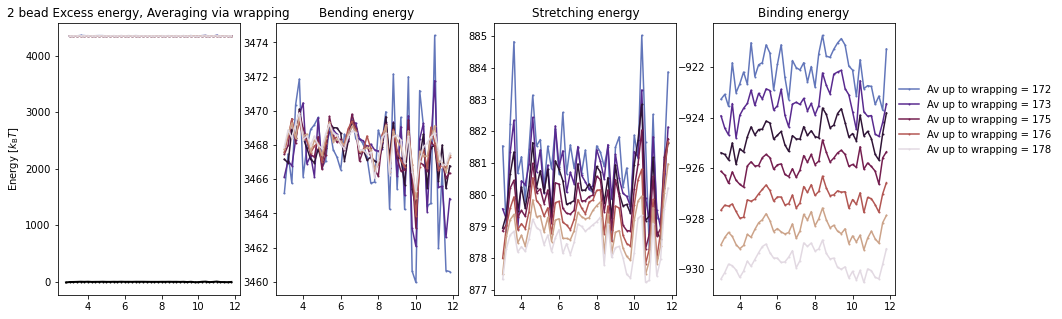

In [5]:
ExcessEn = np.add(Bending,Stretching)
AveragesExcess1 = np.zeros((len(aaa),len(www)))
AveragesStretch1 = np.zeros((len(aaa),len(www)))
AveragesBend1 = np.zeros((len(aaa),len(www)))
AveragesBind1 = np.zeros((len(aaa),len(www)))

cmap1 = plt.cm.get_cmap('twilight') #twilight

fig,ax = plt.subplots(1,4,figsize = (15,5))
takeNum = 22
adnum =17
for ww in range(len(www)-takeNum):
    for a in range(len(aaa)):
        w = ww+adnum
        AveragesExcess1[a,ww]  = np.mean([ExcessEn[a,adnum:w]])
        AveragesStretch1[a,ww]  = np.mean([Stretching[a,adnum:w]])
        AveragesBend1[a,ww]  = np.mean([Bending[a,adnum:w]])
        AveragesBind1[a,ww]  = np.mean([Binding[a,adnum:w]])
        
   
for ww in range(len(www)-takeNum):
    #w = ww+5
    if ww == 2:
        clr = 'black'
        line = 2
    #else:
    clr = cmap1((ww+1)/(len(www)-takeNum))
    line = 1.5
    if ww %3:
        ax[0].plot(aaa[1:]*0.2,AveragesExcess1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
        ax[2].plot(aaa[1:]*0.2,AveragesStretch1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr, label = "Av up to wrapping = "+str(www[ww+1]))
        ax[1].plot(aaa[1:]*0.2,AveragesBend1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
        ax[3].plot(aaa[1:]*0.2,AveragesBind1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr, label = "Av up to wrapping = "+str(www[ww+1]))
    else:
        ax[0].plot(aaa[1:]*0.2,AveragesExcess1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color =clr)
        ax[1].plot(aaa[1:]*0.2,AveragesBend1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
        ax[2].plot(aaa[1:]*0.2,AveragesStretch1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
        ax[3].plot(aaa[1:]*0.2,AveragesBind1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
ax[0].plot(aaa*0.2,AveragesExcess1[:,2]-AveragesExcess1[len(aaa)-1,2]-1, linestyle = '-',marker = 'o',linewidth = 2,markersize = 1, color = 'black')

ax[3].legend(frameon=False, loc = [1.0,0.5])
#ax[0].set_ylim([-7, 8])
#ax[1].set_ylim([-7, 8])
ax[0].set_title(r"2 bead Excess energy, Averaging via wrapping")
ax[1].set_title(r"Bending energy")
ax[2].set_title(r"Stretching energy")
ax[3].set_title(r"Binding energy")
ax[0].set_ylabel(r"Energy $[k_{\mathrm{B}}T]$")

## Plots with STD

/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/billiemeadowcroft/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_9124/2237288994.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  STDsExcess1[a,ww]  = np.sum([ExcEnErr[a,addNum:w]])/(w-addNum-1)
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_9124/2237288994.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  STDsStretch1[a,ww]  = np.sum([StErr[a,addNum:w]])/(w-addNum-1)
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_9124/2237288994.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  STDsBend1[a,ww]  = np.sum([BeErr[a,addNum:w]])/(w-addNum-1)
/v

[4333.58370933 4341.2410469  4331.17673074 4360.87014633 4347.00068388
 4344.72292872 4363.82322344 4350.4546435  4354.67487755 4354.36627432
 4348.86079399 4343.6894625  4353.24495513 4358.11751662 4352.11771171
 4349.81596907 4358.50484926 4351.90671648 4350.53607413 4348.10968063
 4352.93584254 4350.76525546 4349.23404174 4347.98515909 4342.44868464
 4352.99584744 4348.10141296 4350.91522457 4354.8250563  4351.04629745
 4357.71781058 4356.35111539 4347.4462172  4347.36098567 4365.82067706
 4348.62169028 4344.90740317 4360.96610793 4354.50345727 4349.08485555
 4353.34065704 4355.00088396 4347.39836854 4353.81202594 4349.84960048
 4362.53968909]


Text(0, 0.5, 'Energy $[k_{\\mathrm{B}}T]$')

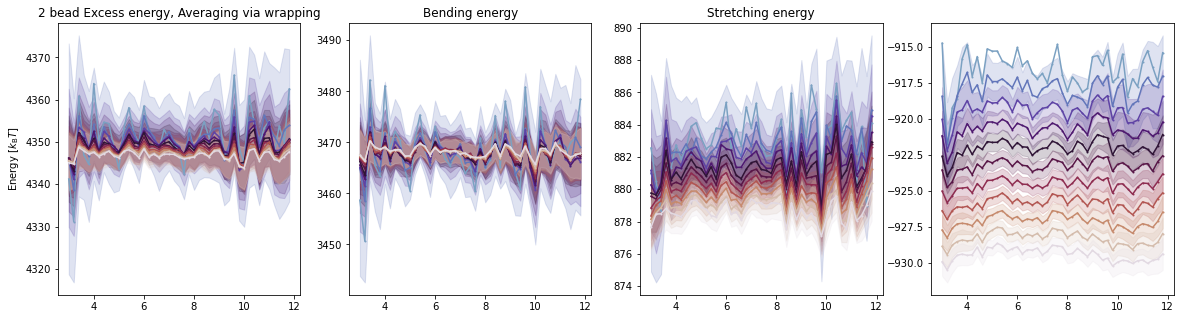

In [6]:
ExcessEn = np.add(Bending,Stretching)
AveragesExcess1 = np.zeros((len(aaa),len(www)))
AveragesStretch1 = np.zeros((len(aaa),len(www)))
AveragesBend1 = np.zeros((len(aaa),len(www)))
AveragesBind1 = np.zeros((len(aaa),len(www)))
STDsExcess1 = np.zeros((len(aaa),len(www)))
STDsStretch1 = np.zeros((len(aaa),len(www)))
STDsBend1 = np.zeros((len(aaa),len(www)))
STDsBind1 = np.zeros((len(aaa),len(www)))

BeErr = np.divide(BeSTD,np.sqrt(jj))
BiErr = np.divide(BiSTD,np.sqrt(jj))
StErr = np.divide(StSTD,np.sqrt(jj))
ExcEnErr =np.add(BeErr,StErr)
fig,ax = plt.subplots(1,4,figsize = (20,5))
takeNum = 18
addNum = 15

for ww in range(len(www)-takeNum):
    for a in range(len(aaa)):
        w = ww+addNum
        AveragesExcess1[a,ww]  = np.mean([ExcessEn[a,addNum:w]])
        AveragesStretch1[a,ww]  = np.mean([Stretching[a,addNum:w]])
        AveragesBend1[a,ww]  = np.mean([Bending[a,addNum:w]])
        AveragesBind1[a,ww]  = np.mean([Binding[a,addNum:w]])
        STDsExcess1[a,ww]  = np.sum([ExcEnErr[a,addNum:w]])/(w-addNum-1)
        STDsStretch1[a,ww]  = np.sum([StErr[a,addNum:w]])/(w-addNum-1)
        STDsBend1[a,ww]  = np.sum([BeErr[a,addNum:w]])/(w-addNum-1)
        STDsBind1[a,ww]  = np.sum([BiErr[a,addNum:w]])/(w-addNum-1)
print(AveragesExcess1[:,1])

zeroVala = 5
f = 1
endAval = 1
for ww in range(len(www)-takeNum):
    #w = ww+5
    if ww == (len(www)-takeNum):
        clr = 'black'
        line = 5
    else:
        clr = cmap1((ww+1)/(len(www)-takeNum))
        line = 1.5
    #if ww %2==0:
    ax[0].plot(aaa[1:]*0.2,AveragesExcess1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
    ax[2].plot(aaa[1:]*0.2,AveragesStretch1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr, label = "Av up to wrapping = "+str(www[ww+1]))
    ax[1].plot(aaa[1:]*0.2,AveragesBend1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
    ax[3].plot(aaa[1:]*0.2,AveragesBind1[1:,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
    ax[0].fill_between(aaa[1:]*0.2, AveragesExcess1[1:,ww]-STDsExcess1[1:,ww],AveragesExcess1[1:,ww]+STDsExcess1[1:,ww], color = clr,alpha = 0.2)
    ax[1].fill_between(aaa[1:]*0.2, AveragesBend1[1:,ww]-STDsBend1[1:,ww],AveragesBend1[1:,ww]+STDsBend1[1:,ww], color = clr,alpha = 0.2)
    ax[2].fill_between(aaa[1:]*0.2, AveragesStretch1[1:,ww]-STDsStretch1[1:,ww],AveragesStretch1[1:,ww]+STDsStretch1[1:,ww], color = clr,alpha = 0.2)
    ax[3].fill_between(aaa[1:]*0.2, AveragesBind1[1:,ww]-STDsBind1[1:,ww],AveragesBind1[1:,ww]+STDsBind1[1:,ww], color = clr,alpha = 0.2)

    #else:
    #    ax[0].plot(aaa[1:]*0.2,AveragesExcess1[1:,ww]-f*AveragesExcess1[-zeroVala,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color =clr)
    #    ax[1].plot(aaa[1:]*0.2,AveragesBend1[1:,ww]-f*AveragesBend1[-zeroVala,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
    #    ax[2].plot(aaa[1:]*0.2,AveragesStretch1[1:,ww]-f*AveragesStretch1[-zeroVala,ww], linestyle = '-',marker = 'o',linewidth = line,markersize = 1, color = clr)
    #    ax[0].fill_between(aaa[1:]*0.2, AveragesExcess1[1:,ww]-STDsExcess1[1:,ww]-f*AveragesExcess1[-zeroVala,ww],AveragesExcess1[1:,ww]+STDsExcess1[1:,ww]-f*AveragesExcess1[-zeroVala,ww], color = clr,alpha = 0.2)
    #    ax[1].fill_between(aaa[1:]*0.2, AveragesBend1[1:,ww]-STDsBend1[1:,ww]-f*AveragesBend1[-zeroVala,ww],AveragesBend1[1:,ww]+STDsBend1[1:,ww]-f*AveragesBend1[-zeroVala,ww], color = clr,alpha = 0.2)
    #    ax[2].fill_between(aaa[1:]*0.2, AveragesStretch1[1:,ww]-STDsStretch1[1:,ww]-f*AveragesStretch1[-zeroVala,ww],AveragesStretch1[1:,ww]+STDsStretch1[1:,ww]-f*AveragesStretch1[-zeroVala,ww], color = clr,alpha = 0.2)
#ax[0].plot(aaa[:],AveragesExcess1[:,1])
#ax[0].plot(aaa*0.2,AveragesExcess1[:,2]-AveragesExcess1[len(aaa)-1,2]-1, linestyle = '-',marker = 'o',linewidth = 2,markersize = 1, color = 'black')
ax[3].legend(frameon=False, loc = [1.0,0.5])
#ax[0].set_ylim([-20, 20])
#ax[1].set_ylim([-20, 20])
#ax[2].set_ylim([-20, 20])
#ax[3].set_ylim([-20, 20])
ax[0].set_title(r"2 bead Excess energy, Averaging via wrapping")
ax[1].set_title(r"Bending energy")
ax[2].set_title(r"Stretching energy")
ax[0].set_ylabel(r"Energy $[k_{\mathrm{B}}T]$")

## Final Plot?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-10.0, 10.0)

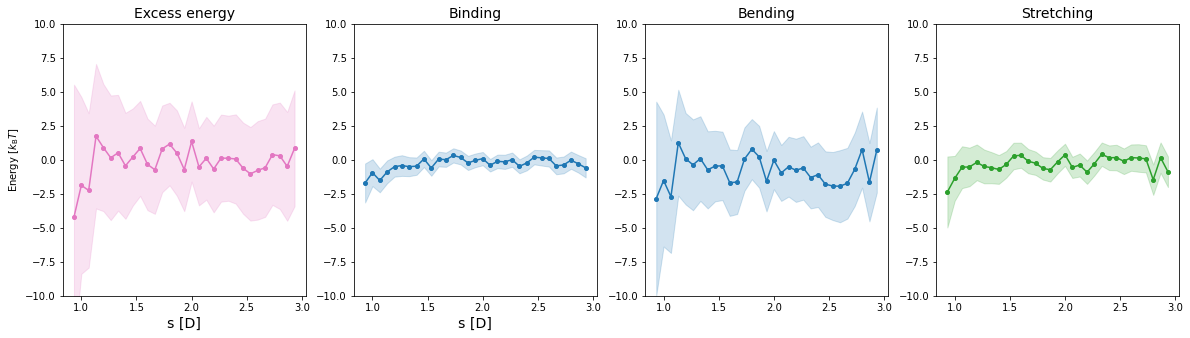

In [7]:
fig,ax = plt.subplots(1,4,figsize = (20,5))
clrs = ['#2A0944','#3FA796','#FEC260', '#A10035','pink','lightsalmon']
endAval = 15
wVal = len(www)-takeNum-1
#1/15
zeroBen = 3469
zeroExc = 4347
zeroBin = -929
zeroStr = 879
ax[0].plot(aaa[:-endAval]*1/15,AveragesExcess1[:-endAval,wVal]-zeroExc, linestyle = '-',marker = 'o',linewidth = line,markersize = 4, color = 'tab:pink')
ax[0].fill_between(aaa[:-endAval]*1/15, AveragesExcess1[:-endAval,wVal]-STDsExcess1[:-endAval,wVal]-zeroExc,AveragesExcess1[:-endAval,wVal]+STDsExcess1[:-endAval,wVal]-zeroExc, color = 'tab:pink',alpha = 0.2)
ax[1].plot(aaa[:-endAval]*1/15,AveragesBind1[:-endAval,wVal]-zeroBin, linestyle = '-',marker = 'o',linewidth = line,markersize = 4, color = 'tab:blue')
ax[1].fill_between(aaa[:-endAval]*1/15, AveragesBind1[:-endAval,wVal]-STDsBind1[:-endAval,wVal]-zeroBin,AveragesBind1[:-endAval,wVal]+STDsBind1[:-endAval,wVal]-zeroBin, color = 'tab:blue',alpha = 0.2)
ax[2].plot(aaa[:-endAval]*1/15,AveragesBend1[:-endAval,wVal]-zeroBen, linestyle = '-',marker = 'o',linewidth = line,markersize = 4, color = 'tab:blue')
ax[2].fill_between(aaa[:-endAval]*1/15, AveragesBend1[:-endAval,wVal]-STDsBend1[:-endAval,wVal]-zeroBen,AveragesBend1[:-endAval,wVal]+STDsBend1[:-endAval,wVal]-zeroBen, color = 'tab:blue',alpha = 0.2)
ax[3].plot(aaa[:-endAval]*1/15,AveragesStretch1[:-endAval,wVal]-zeroStr, linestyle = '-',marker = 'o',linewidth = line,markersize = 4, color = 'tab:green')
ax[3].fill_between(aaa[:-endAval]*1/15, AveragesStretch1[:-endAval,wVal]-STDsStretch1[:-endAval,wVal]-zeroStr,AveragesStretch1[:-endAval,wVal]+STDsStretch1[:-endAval,wVal]-zeroStr, color = 'tab:green',alpha = 0.2)
#print(AveragesExcess1)
ax[1].legend(frameon=False, loc = [1.0,0.5])
#ax[0].set_ylim([-9, 5])
#ax[1].set_ylim([-7, 8])
ax[0].set_title(r"Excess energy",fontsize  = 14)
ax[1].set_title(r"Binding",fontsize  = 14)
ax[2].set_title(r"Bending",fontsize  = 14)
ax[3].set_title(r"Stretching",fontsize  = 14)
ax[0].set_xlabel('s [D]',fontsize  = 14)
ax[1].set_xlabel('s [D]',fontsize  = 14)
ax[0].set_ylabel(r"Energy $[k_{\mathrm{B}}T]$")
##ax[0].set_ylim([4335,4355])
#ax[1].set_ylim([-940,-920])
#ax[2].set_ylim([3457,3477])
#ax[3].set_ylim([870,890])

ax[0].set_ylim([-10,10])
ax[1].set_ylim([-10,10])
ax[2].set_ylim([-10,10])
ax[3].set_ylim([-10,10])


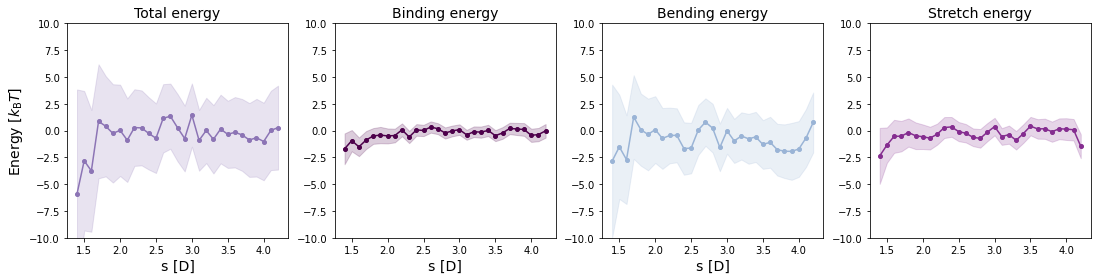

In [8]:
fig2,ax2 = plt.subplots(1,4,figsize = (16,4))
cmap1 = plt.cm.get_cmap('BuPu')
endAval = 17
wVal = len(www)-takeNum-1
ax2[0].plot(aaa[:-endAval]*1/10,AveragesExcess1[:-endAval,wVal]+AveragesBind1[:-endAval,wVal]-zeroExc-zeroBin, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(3/5))
ax2[0].fill_between(aaa[:-endAval]*1/10, AveragesExcess1[:-endAval,wVal]+AveragesBind1[:-endAval,wVal]-STDsExcess1[:-endAval,wVal]-zeroExc-zeroBin,AveragesExcess1[:-endAval,wVal]+AveragesBind1[:-endAval,wVal]+STDsExcess1[:-endAval,wVal]-zeroExc-zeroBin,color = cmap1(3/5),alpha = 0.2)
ax2[1].plot(aaa[:-endAval]*1/10,AveragesBind1[:-endAval,wVal]-zeroBin, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(5/5))
ax2[1].fill_between(aaa[:-endAval]*1/10, AveragesBind1[:-endAval,wVal]-STDsBind1[:-endAval,wVal]-zeroBin,AveragesBind1[:-endAval,wVal]+STDsBind1[:-endAval,wVal]-zeroBin, color = cmap1(5/5),alpha = 0.2)
ax2[2].plot(aaa[:-endAval]*1/10,AveragesBend1[:-endAval,wVal]-zeroBen, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(2/5))
ax2[2].fill_between(aaa[:-endAval]*1/10, AveragesBend1[:-endAval,wVal]-STDsBend1[:-endAval,wVal]-zeroBen,AveragesBend1[:-endAval,wVal]+STDsBend1[:-endAval,wVal]-zeroBen, color = cmap1(2/5),alpha = 0.2)

ax2[3].plot(aaa[:-endAval]*1/10,AveragesStretch1[:-endAval,wVal]-zeroStr, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(4/5))
ax2[3].fill_between(aaa[:-endAval]*1/10, AveragesStretch1[:-endAval,wVal]-STDsStretch1[:-endAval,wVal]-zeroStr,AveragesStretch1[:-endAval,wVal]+STDsStretch1[:-endAval,wVal]-zeroStr, color = cmap1(4/5),alpha = 0.2)
#ax2[0].fill_between(aaa*1/15,Energy[:] - EnErr,Energy[:] +EnErr,alpha = 0.2, color = cmap1(3/5))


ax2[1].set_title(r"Binding energy" ,fontsize = 14)
ax2[0].set_title(r"Total energy" ,fontsize = 14)
ax2[2].set_title(r"Bending energy" ,fontsize = 14)
ax2[0].set_ylabel(r'Energy $[k_{\mathrm{B}}T]$',fontsize = 14)
ax2[3].set_title(r"Stretch energy" ,fontsize = 14)


ax2[0].set_xlabel('s [D]',fontsize  = 14)
ax2[1].set_xlabel('s [D]',fontsize  = 14)
ax2[2].set_xlabel('s [D]',fontsize  = 14)
ax2[0].set_ylim([-10,+10])
ax2[1].set_ylim([-10,+10])
ax2[2].set_ylim([-10,+10])
ax2[3].set_ylim([-10,+10])
fig2.tight_layout()
fig2.subplots_adjust(right = 0.95)
#fname = 'ShowingWrappingBiasData_2INTbin_zeroed.pdf'
#fig2.savefig(plotsdir+fname)

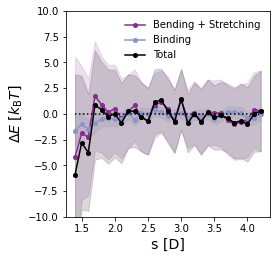

In [9]:



fig2,ax2 = plt.subplots(1,figsize = (4,3.7))
cmap1 = plt.cm.get_cmap('BuPu')
endAval = 17
wVal = len(www)-takeNum-1
#ax2[1].plot(aaa[:-endAval]*1/10,AveragesBend1[:-endAval,wVal]-zeroBen, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(2.5/5),label = "Bending energy")
#ax2[1].fill_between(aaa[:-endAval]*1/10, AveragesBend1[:-endAval,wVal]-STDsBend1[:-endAval,wVal]-zeroBen,AveragesBend1[:-endAval,wVal]+STDsBend1[:-endAval,wVal]-zeroBen, color = cmap1(2.5/5),alpha = 0.2)
ax2.plot(aaa[:-endAval]*1/10,AveragesExcess1[:-endAval,wVal]-zeroExc, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(4/5),label = "Bending + Stretching")
ax2.fill_between(aaa[:-endAval]*1/10, AveragesExcess1[:-endAval,wVal]-STDsExcess1[:-endAval,wVal]-zeroExc,AveragesExcess1[:-endAval,wVal]+STDsExcess1[:-endAval,wVal]-zeroExc, color = cmap1(4/5),alpha = 0.15)
ax2.plot(aaa[:-endAval]*1/10,AveragesBind1[:-endAval,wVal]-zeroBin, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(2.5/5),label = "Binding")
ax2.fill_between(aaa[:-endAval]*1/10, AveragesBind1[:-endAval,wVal]-STDsBind1[:-endAval,wVal]-zeroBin,AveragesBind1[:-endAval,wVal]+STDsBind1[:-endAval,wVal]-zeroBin, color = cmap1(2.5/5),alpha = 0.15)

#ax2[1].plot(aaa[:-endAval]*1/10,AveragesStretch1[:-endAval,wVal]-zeroStr, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(4/5),label = "Stretching energy")
#ax2[1].fill_between(aaa[:-endAval]*1/10, AveragesStretch1[:-endAval,wVal]-STDsStretch1[:-endAval,wVal]-zeroStr,AveragesStretch1[:-endAval,wVal]+STDsStretch1[:-endAval,wVal]-zeroStr, color = cmap1(4/5),alpha = 0.2)
#ax2[0].fill_between(aaa*1/15,Energy[:] - EnErr,Energy[:] +EnErr,alpha = 0.2, color = cmap1(3/5))
ax2.plot(aaa[:-endAval]*1/10,AveragesExcess1[:-endAval,wVal]+AveragesBind1[:-endAval,wVal]-zeroExc-zeroBin, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = 'black',label = "Total")
ax2.fill_between(aaa[:-endAval]*1/10, AveragesExcess1[:-endAval,wVal]+AveragesBind1[:-endAval,wVal]-STDsExcess1[:-endAval,wVal]-zeroExc-zeroBin,AveragesExcess1[:-endAval,wVal]+AveragesBind1[:-endAval,wVal]+STDsExcess1[:-endAval,wVal]-zeroExc-zeroBin,color = 'black',alpha = 0.15)

ax2.set_xticks([1.5,2,2.5,3,3.5,4])
#ax2[1].set_yticks([])
#ax2.set_title(r"2 bead interaction" ,fontsize = 14)
ax2.set_ylabel(r'$\Delta E$ $[k_{\mathrm{B}}T]$',fontsize = 14)
ax2.set_xlabel('s [D]',fontsize  = 14)
#ax2[1].set_xlabel('s [D]',fontsize  = 14)
ax2.set_ylim([-10,+10])
#ax2[1].set_ylim([-10,+10])
ax2.legend(frameon=False)
#ax2[1].legend(frameon=False)
ax2.plot([1.4,4.2],[0,0],linestyle = ':',color = 'black')
fig2.tight_layout()
fig2.subplots_adjust(right = 0.95)
#fname = '2BeadInteraction_1plot.pdf'
#fig2.savefig(plotsdir+fname)

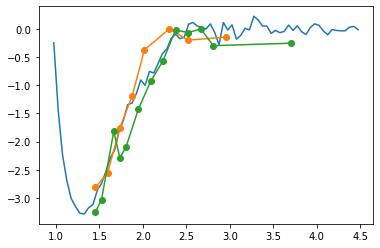

In [10]:

fname = 'data_two_casper.csv'

s_ = pandas.read_csv(expdatadir  + fname, sep=',', usecols = [0],header = 'infer')
interaction_ = pandas.read_csv(expdatadir  + fname, sep=',', usecols = [1], header = 'infer')
s = s_.values
#print(s)
interaction = interaction_.values
fig,ax = plt.subplots()
ax.plot(s,interaction)

fname = 'run1.csv'
fname2 = 'run2.csv'
l1 = pandas.read_csv(afshindatadir   + fname, sep=';', usecols = [0], header = None)
l1_=l1.values*20.9

l11 = pandas.read_csv(afshindatadir + fname, sep=';', usecols = [2], header = None)
l11_=l11.values

l2 = pandas.read_csv(afshindatadir + fname2, sep=';', usecols = [0], header = None)
l22 = pandas.read_csv(afshindatadir + fname2, sep=';', usecols = [2], header = None)
l2_=l2.values*20.9
l22_=l22.values
ax.plot(l11_,l1_-np.max(l1_),marker = 'o')
ax.plot(l22_,l2_-np.max(l2_),marker = 'o')




/Users/billiemeadowcroft/Dropbox/Tether/Plotting/Plotting2Beads/Plots/


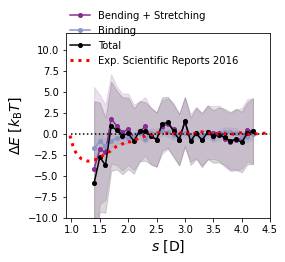

In [15]:
fig2,ax2 = plt.subplots(1,figsize = (4,3.7))
cmap1 = plt.cm.get_cmap('BuPu')
endAval = 17
wVal = len(www)-takeNum-1
##ax2[1].plot(aaa[:-endAval]*1/10,AveragesBend1[:-endAval,wVal]-zeroBen, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(2.5/5),label = "Bending energy")
##ax2[1].fill_between(aaa[:-endAval]*1/10, AveragesBend1[:-endAval,wVal]-STDsBend1[:-endAval,wVal]-zeroBen,AveragesBend1[:-endAval,wVal]+STDsBend1[:-endAval,wVal]-zeroBen, color = cmap1(2.5/5),alpha = 0.2)
ax2.plot(aaa[:-endAval]*1/10,AveragesExcess1[:-endAval,wVal]-zeroExc, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(4/5),label = "Bending + Stretching")
ax2.fill_between(aaa[:-endAval]*1/10, AveragesExcess1[:-endAval,wVal]-STDsExcess1[:-endAval,wVal]-zeroExc,AveragesExcess1[:-endAval,wVal]+STDsExcess1[:-endAval,wVal]-zeroExc, color = cmap1(4/5),alpha = 0.15)
ax2.plot(aaa[:-endAval]*1/10,AveragesBind1[:-endAval,wVal]-zeroBin, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(2.5/5),label = "Binding")
ax2.fill_between(aaa[:-endAval]*1/10, AveragesBind1[:-endAval,wVal]-STDsBind1[:-endAval,wVal]-zeroBin,AveragesBind1[:-endAval,wVal]+STDsBind1[:-endAval,wVal]-zeroBin, color = cmap1(2.5/5),alpha = 0.15)

##ax2[1].plot(aaa[:-endAval]*1/10,AveragesStretch1[:-endAval,wVal]-zeroStr, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(4/5),label = "Stretching energy")
##ax2[1].fill_between(aaa[:-endAval]*1/10, AveragesStretch1[:-endAval,wVal]-STDsStretch1[:-endAval,wVal]-zeroStr,AveragesStretch1[:-endAval,wVal]+STDsStretch1[:-endAval,wVal]-zeroStr, color = cmap1(4/5),alpha = 0.2)
##ax2[0].fill_between(aaa*1/15,Energy[:] - EnErr,Energy[:] +EnErr,alpha = 0.2, color = cmap1(3/5))
ax2.plot(aaa[:-endAval]*1/10,AveragesExcess1[:-endAval,wVal]+AveragesBind1[:-endAval,wVal]-zeroExc-zeroBin, linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = 'black',label = "Total")
ax2.fill_between(aaa[:-endAval]*1/10, AveragesExcess1[:-endAval,wVal]+AveragesBind1[:-endAval,wVal]-STDsExcess1[:-endAval,wVal]-zeroExc-zeroBin,AveragesExcess1[:-endAval,wVal]+AveragesBind1[:-endAval,wVal]+STDsExcess1[:-endAval,wVal]-zeroExc-zeroBin,color = 'black',alpha = 0.15)

#ax2.plot(l11_,l1_-np.max(l1_),marker = 'o',color = 'blue',markersize = 3,linestyle = '',label = 'Sim. Scientific reports 2016')
#ax2.plot(l22_,l2_-np.max(l2_),marker = 'o',color = 'blue',markersize = 3,linestyle = '')

ax2.plot(s,interaction,color = 'red',linestyle = ':',linewidth = 3,label = 'Exp. Scientific Reports 2016')
ax2.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5])
#ax2[1].set_yticks([])
#ax2.set_title(r"2 bead interaction" ,fontsize = 14)
ax2.set_ylabel(r'$\Delta E$ $[k_{\mathrm{B}}T]$',fontsize = 14)
ax2.set_xlabel('$s$ [D]',fontsize  = 14)
#ax2[1].set_xlabel('s [D]',fontsize  = 14)
ax2.set_ylim([-10,+12])
ax2.set_xlim([0.9,4.5])
#ax2[1].set_ylim([-10,+10])
#ax2.legend(frameon=False,loc = [0.,0.60])
ax2.legend(frameon=False,loc = [0.,0.80])
#ax2[1].legend(frameon=False)
ax2.plot([1.,4.5],[0,0],linestyle = ':',color = 'black')
fig2.tight_layout()
fig2.subplots_adjust(right = 0.95)
#fname = '2BeadInteraction_1plot_wtExp_andAfshin.pdf'
fname = '2BeadInteraction_sim_exp.pdf'
fig2.savefig(plotsdir+fname)
print(plotsdir)

In [20]:
# Saving data
fname = '2BeadInteractionData.txt'
fname2 = '2BeadExpData.txt'

f=open(plotsdir+fname,'w')
f2=open(plotsdir+fname2,'w')
f.write('s Excess Bind Excess_std Bind_std\n')
f2.write('s Exp\n')

for i in range(len(s)):
    f2.write(str(float(s[i]))+' '+str(float(interaction[i]))+'\n')
f2.close()

for ii in range(len(aaa)):
    f.write(str(float(aaa[ii]*1/10))+' '+str(float(AveragesExcess1[ii,wVal]-zeroExc))+' '+ str(float(AveragesBind1[ii,wVal]-zeroBin))+' '+ str(float(STDsExcess1[ii,wVal]))+' '+ str(float(STDsBind1[ii,wVal]))+'\n')
f.close()

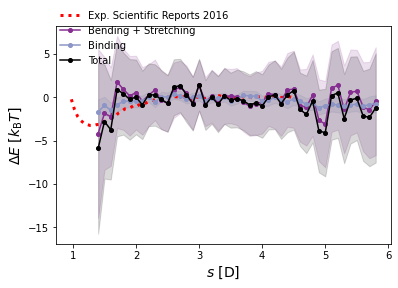

In [35]:
fig,ax = plt.subplots()

experiment = pandas.read_csv(plotsdir  + fname2, sep=' ', header = 'infer')
s = experiment.s
interaction = experiment.Exp

simulation = pandas.read_csv(plotsdir  + fname, sep=' ', header = 'infer')
ss = simulation.s
Excess = simulation.Excess
Bind = simulation.Bind
Excess_std = simulation.Excess_std
Bind_std = simulation.Bind_std

endAval = 1 #17
Total = np.add(Excess,Bind)
Total_std = np.sqrt(np.add(np.multiply(Bind_std,Bind_std),np.multiply(Excess_std,Excess_std)))
ax.plot(s,interaction,color = 'red',linestyle = ':',linewidth = 3,label = 'Exp. Scientific Reports 2016')
ax.plot(ss[:-endAval],Excess[:-endAval], linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(4/5),label = "Bending + Stretching")
ax.fill_between(ss[:-endAval],np.add(Excess[:-endAval],-Excess_std[:-endAval]),np.add(Excess[:-endAval],Excess_std[:-endAval]), color = cmap1(4/5),alpha = 0.15)
ax.plot(ss[:-endAval],Bind[:-endAval], linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(2.5/5),label = "Binding")
ax.fill_between(ss[:-endAval],np.add(Bind[:-endAval],-Bind_std[:-endAval]),np.add(Bind[:-endAval],Bind_std[:-endAval]), color = cmap1(2.5/5),alpha = 0.15)
ax.plot(ss[:-endAval],Total[:-endAval], linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = 'black',label = "Total")
ax.fill_between(ss[:-endAval],np.add(Total[:-endAval],-Total_std[:-endAval]),np.add(Total[:-endAval],Total_std[:-endAval]),color = 'black',alpha = 0.15)
ax.set_ylabel(r'$\Delta E$ $[k_{\mathrm{B}}T]$',fontsize = 14)
ax.set_xlabel('$s$ [D]',fontsize  = 14)
ax.legend(frameon=False,loc = [0.,0.80])